In [2]:
import numpy as np
# Creating an Array
A = np.array([
        [ 3,  7],
        [-4, -6],
        [ 7,  8],
        [ 1, -1],
        [-4, -1],
        [-3, -7]])

In [3]:
A.shape

(6, 2)

In [4]:
import pandas as pd

In [6]:
df=pd.DataFrame(A,columns=['a0','a1'])

In [7]:
df

,a0,a1
0,3,7
1,-4,-6
2,7,8
3,1,-1
4,-4,-1
5,-3,-7


In [12]:
a0=A[:,0]
a1=A[:,1]

In [13]:
a0

array([ 3, -4,  7,  1, -4, -3])

In [14]:
a1

array([ 7, -6,  8, -1, -1, -7])

In [15]:
np.cov(a0,a1)

array([[20., 25.],
       [25., 40.]])

In [ ]:
np.sum

In [23]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
df=pd.read_csv("D:/ineuron/ML/NOTES/Mall_Customers.csv")

In [25]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [26]:
x=df[["Annual Income (k$)",'Spending Score (1-100)']]

In [27]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [28]:
from sklearn.cluster import KMeans

In [29]:
wcss=[]
for i in range(1,15):
    kmean=KMeans(n_clusters=i,init='k-means++',random_state=30)
    kmean.fit(x)
    wcss.append(kmean.inertia_)

C:\Users\Amit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


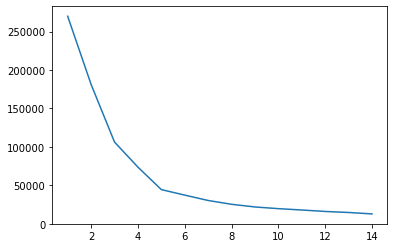

In [30]:
plt.plot(range(1,15),wcss)

In [31]:
kmean1=KMeans(n_clusters=5,init='k-means++',random_state=30)
kmean1.fit_predict(x)

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1,
       4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 1, 3, 2, 3, 2, 3,
       1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

In [32]:
x['cluster_num']=kmean1.fit_predict(x)

C:\Users\Amit\AppData\Local\Temp/ipykernel_7256/526477975.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['cluster_num']=kmean1.fit_predict(x)


In [33]:
x

,Annual Income (k$),Spending Score (1-100),cluster_num
0,15,39,4
1,15,81,0
2,16,6,4
3,16,77,0
4,17,40,4
...,...,...,...
195,120,79,3
196,126,28,2
197,126,74,3
198,137,18,2


In [37]:
x[x['cluster_num']==4]

,Annual Income (k$),Spending Score (1-100),cluster_num
0,15,39,4
2,16,6,4
4,17,40,4
6,18,6,4
8,19,3,4
10,19,14,4
12,20,15,4
14,20,13,4
16,21,35,4
18,23,29,4


In [38]:
kmean1.predict([[55,31]])

array([1])

In [43]:
from sklearn.cluster import MiniBatchKMeans
minibatch_kmeans=MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(x)

C:\Users\Amit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


MiniBatchKMeans(n_clusters=5)

In [44]:
minibatch_kmeans.predict([[55,31,4]])

array([2])

In [53]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [49]:
dbscan=DBSCAN(eps=1,min_samples=3)
dbscan.fit(x)

DBSCAN(eps=1, min_samples=3)

In [50]:
x

,Annual Income (k$),Spending Score (1-100),cluster_num
0,15,39,4
1,15,81,0
2,16,6,4
3,16,77,0
4,17,40,4
...,...,...,...
195,120,79,3
196,126,28,2
197,126,74,3
198,137,18,2


In [52]:
set(dbscan.labels_)

{-1, 0, 1, 2, 3, 4, 5}

In [ ]:
metrics.adjusted_rand_score()

In [54]:
true_label = x['cluster_num']
predicted_label = X['cluster_number']
metrics.adjusted_rand_score(cluster_num,dbscan.labels_)


NameError: name 'X' is not defined

In [58]:
metrics.adjusted_rand_score(df['cluster_num'],dbscan.labels_)

KeyError: 'cluster_num'

# NAIVE BAYES

In [59]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import  StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix , roc_auc_score , roc_curve
import matplotlib.pyplot as plt

In [60]:
df1=pd.read_csv('D:/ineuron/ML/NOTES/diabetes.csv')

In [61]:
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [68]:
x=df1.drop(columns=['Outcome'])
y=df1.Outcome

In [70]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [71]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [72]:
scaler=StandardScaler()

In [73]:
x_scaled=scaler.fit_transform(x)

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=.25,random_state=30)

In [76]:
naive_bayes=GaussianNB()
naive_bayes.fit(x_train,y_train)

GaussianNB()

In [77]:
naive_bayes.score(x_test,y_test)

0.7916666666666666